                  area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Be

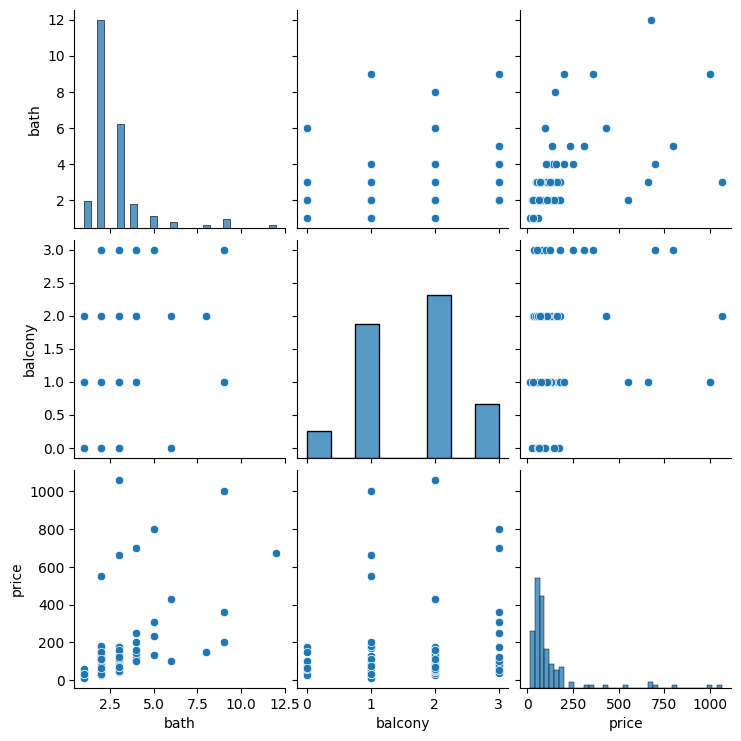

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
Encoded DataFrame:
                  area_type   availability                  location size  \
0      Super built-up  Area         19-Dec  Electronic City Phase II    2   
1                Plot  Area  Ready To Move          Chikka Tirupa

In [12]:
# BHARAT INTERN TASK-2: HOUSE PRICE PREDICTION USING PYTHON, SCIKIT-LEARN, AND TENSORFLOW
# NAME: KAPIL GUPTA, EMAIL: kapilgupta50347@gmail.com

# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# convert dataset in csv format to dataframe
df=pd.read_csv('https://raw.githubusercontent.com/kapilgupta50347/Bharat_Intern/main/March_2024/Bengaluru_House_Data.csv')
print(df)
print(df.describe())

# Data Visualization
sampled_df = df.sample(frac=0.01)  # Sample 1% of the data
sns.pairplot(sampled_df)
plt.show()

# Extract numerical values using regular expressions
df['size'] = df['size'].str.extract(r'(\d+)')

# Identify the unique values in availability
unique_values = df['availability'].unique()
print(unique_values)
# Map the first unique value to 1 and rest of the values to 2
encoding_dict = {value: 1 if value == unique_values[1] else 2 for value in unique_values}

# Apply the custom encoding to availability
df['availability_encoded'] = df['availability'].map(encoding_dict)

# Label encoding for areat_type
label_encoder = LabelEncoder()
df['area_type_en'] = label_encoder.fit_transform(df['area_type'])
print("Encoded DataFrame:")
print(df)

In [13]:
# Drop unrequired columns
df=df.drop(['location','society','area_type','availability'],axis=1)
print(df.info())
# Function to check if a value is numeric
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Drop rows with string values in the numerical column
numeric_indices = [index for index, value in enumerate(df['total_sqft']) if is_numeric(value)]
df = df.iloc[numeric_indices]

print("DataFrame after dropping rows with string values in the numerical column:")
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   size                  13304 non-null  object 
 1   total_sqft            13320 non-null  object 
 2   bath                  13247 non-null  float64
 3   balcony               12711 non-null  float64
 4   price                 13320 non-null  float64
 5   availability_encoded  13320 non-null  int64  
 6   area_type_en          13320 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 728.6+ KB
None
DataFrame after dropping rows with string values in the numerical column:
      size total_sqft  bath  balcony   price  availability_encoded  \
0        2       1056   2.0      1.0   39.07                     2   
1        4       2600   5.0      3.0  120.00                     1   
2        3       1440   2.0      3.0   62.00                     1   
3        3

           size  total_sqft      bath   balcony     price  \
0      0.023810    0.020183  0.025641  0.333333  0.008650   
1      0.071429    0.049722  0.102564  1.000000  0.031180   
2      0.047619    0.027530  0.025641  1.000000  0.015033   
3      0.047619    0.029079  0.051282  0.333333  0.024220   
4      0.023810    0.022938  0.025641  0.333333  0.011971   
...         ...         ...       ...       ...       ...   
13068  0.095238    0.066040  0.076923  0.000000  0.062082   
13069  0.071429    0.068853  0.102564       NaN  0.109131   
13070  0.023810    0.021809  0.025641  0.333333  0.014477   
13071  0.071429    0.089686  0.076923  0.333333  0.133630   
13072  0.000000    0.010503  0.000000  0.333333  0.002506   

       availability_encoded  area_type_en  
0                       1.0      1.000000  
1                       0.0      0.666667  
2                       0.0      0.000000  
3                       0.0      1.000000  
4                       0.0      1.000000  
...

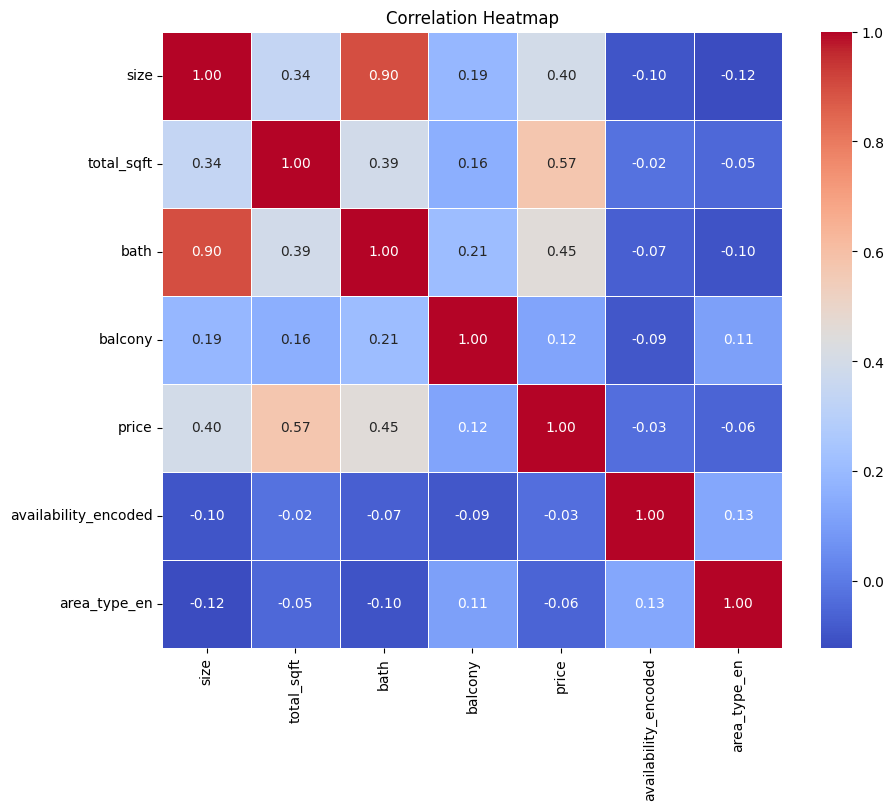

Correlation of attributes with target attribute 'price': 

size                    0.395009
total_sqft              0.572904
bath                    0.454468
balcony                 0.120875
price                   1.000000
availability_encoded   -0.032880
area_type_en           -0.056072
Name: price, dtype: float64
Columns correlated with target variable (above 0.0):
size
total_sqft
bath
balcony
price
size            8
total_sqft      0
bath           16
balcony       548
price           0
dtype: int64
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the attributes
# 1. MinMaxScaler: Scale features to a range [0, 1]
scaler_minmax = MinMaxScaler()
scaled_data_minmax = scaler_minmax.fit_transform(df)
df = pd.DataFrame(scaled_data_minmax, columns=df.columns)
print(df)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Filter for columns with correlation higher than 0.0
print("Correlation of attributes with target attribute 'price': \n")
correlation=df.corr()['price']
print(correlation)
filtered_corr = correlation[correlation > 0.0]

# Print column names
print("Columns correlated with target variable (above 0.0):")
for col in filtered_corr.index:
  print(col)

#Drop columns that have correlation less than 0.0
df=df.drop(['availability_encoded','area_type_en'],axis=1)

print(df.isna().sum())
df=df.fillna(df.mean())
print(df.isna().sum())

[[0.02380952 0.02018328 0.02564103 0.33333333]
 [0.07142857 0.04972164 0.1025641  1.        ]
 [0.04761905 0.02752961 0.02564103 1.        ]
 ...
 [0.02380952 0.02180942 0.02564103 0.33333333]
 [0.07142857 0.08968644 0.07692308 0.33333333]
 [0.         0.01050296 0.         0.33333333]]
[0.00864978 0.0311804  0.01503341 ... 0.01447661 0.13363029 0.00250557]
82/82 [==============================] - 0s 2ms/step - loss: 9.8359e-04
Random Forest Regressor Metrics:
Mean Squared Error (MSE): 0.001012923685223122
Mean Absolute Error (MAE): 0.010888957664419557
R-squared (R2): 0.503600640777816

TensorFlow Model Loss: 0.0009835859527811408


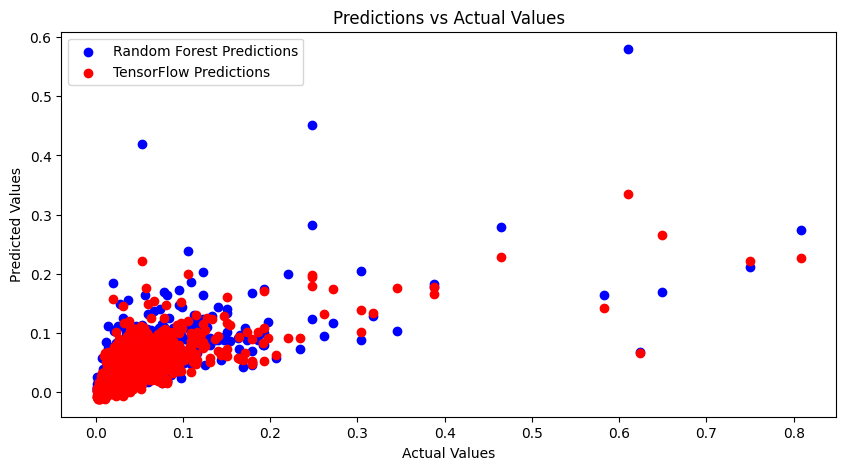

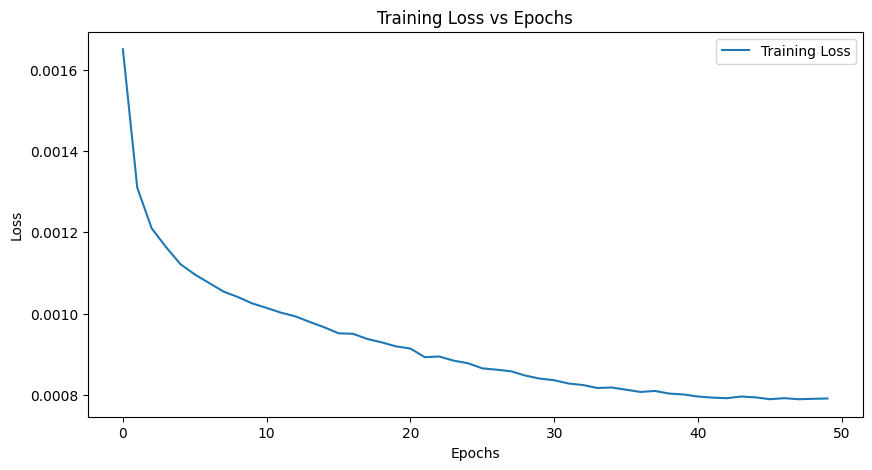

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# As df is your DataFrame with 4 independent variables (X) and 1 target variable (y)
# Divide the data into features (independent variables) and target (dependent variable)
X=df.iloc[:,0:4].values
print(X)

y=df.iloc[:,4].values
print(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
rf_y_pred = rf_regressor.predict(X_test)

# TensorFlow model
# Build the TensorFlow model
tf_model = Sequential([Dense(10, activation='relu', input_shape=(4,)),Dense(1)])

# Compile the model
tf_model.compile(optimizer='adam', loss='mse')

# Train the model
history = tf_model.fit(X_train, y_train, epochs=50, verbose=0)

# Predictions using TensorFlow model
tf_y_pred = tf_model.predict(X_test).flatten()

# Metrics for Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Metrics for TensorFlow model
tf_loss = tf_model.evaluate(X_test, y_test)

# Print metrics
print("Random Forest Regressor Metrics:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)
print("\nTensorFlow Model Loss:", tf_loss)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_y_pred, color='blue', label='Random Forest Predictions')
plt.scatter(y_test, tf_y_pred, color='red', label='TensorFlow Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

# Plotting loss vs epochs for TensorFlow model
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()